In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [9]:
# Importing csv dataset with pandas
data = pd.read_csv('kc_house_data.csv')

# Using the first 10000 rows for training
data = data[:10000]

# Looking at the first 5 rows of dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


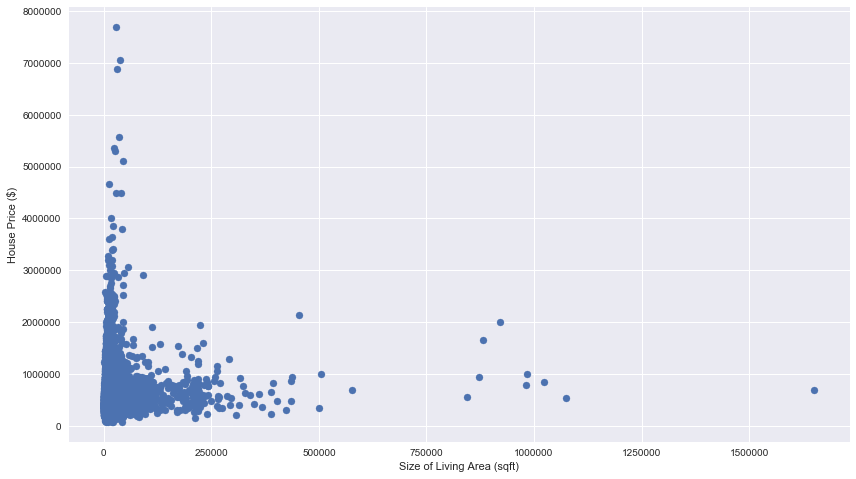

In [23]:
# Using sqft_living as X_values and price as Y_values, we want to predict the price
# of a house given the lot size in King's County
points = data.as_matrix(['sqft_lot', 'price'])

# Looking at the plot of the points, we can see a linear trend 
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel('Size of Living Area (sqft)')
ax.set_ylabel('House Price ($)')
plt.scatter(points[:,0], points[:,1])
plt.show()

In [24]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [25]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [30]:
def step_gradient2(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [31]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [36]:
# Hyperparameters
learning_rate = 0.0000000001
iterations = 1000

b, m = run(learning_rate, iterations)

Starting gradient descent at b = 0, m = 0, error = 426386764825.6594
Running...
Iteration 0, b:0.00010666231912000016, m:2.0186164359260825, error:394952728466.2781
Iteration 100, b:0.009373284501399069, m:4.415614262768769, error:381819597878.3815
Iteration 200, b:0.01862308719114526, m:4.415614197864469, error:381819589322.49756
Iteration 300, b:0.027872889716715227, m:4.4156141329601715, error:381819580766.6123
Iteration 400, b:0.037122692078108976, m:4.415614068055875, error:381819572210.7291
Iteration 500, b:0.04637249427532652, m:4.415614003151577, error:381819563654.846
Iteration 600, b:0.055622296308367826, m:4.415613938247284, error:381819555098.9596
Iteration 700, b:0.06487209817723288, m:4.41561387334299, error:381819546543.0788
Iteration 800, b:0.07412189988192174, m:4.415613808438697, error:381819537987.194
Iteration 900, b:0.08337170142243451, m:4.415613743534407, error:381819529431.3116
After 1000 iterations b = 0.09252900478582021, m = 4.41561367927916, error = 38181952

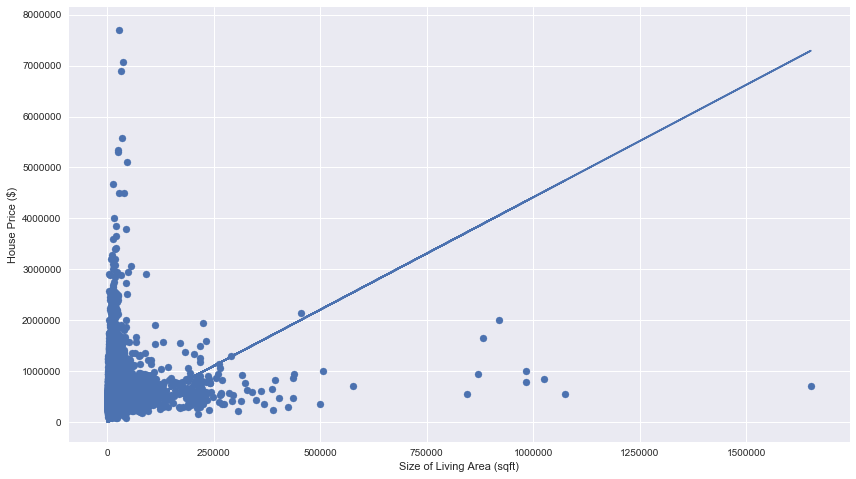

In [37]:
# Comparing best-fit line with dataset
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel('Size of Living Area (sqft)')
ax.set_ylabel('House Price ($)')
plt.plot(points[:,0], predict(b, m, points[:,0]))
plt.scatter(points[:,0], points[:,1])
plt.show()